In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random as rnd
from PIL import Image
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report

In [2]:
# import tensorflow as tf
# tf.keras.backend.clear_session()

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
training_set= datagen.flow_from_directory(
    '../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)
validation_set= datagen.flow_from_directory(
    '../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [5]:
categories = 38
mobile_model = tf.keras.applications.MobileNetV2(weights = 'imagenet', include_top = False,input_shape=(224,224,3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential()
model.add(mobile_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(units=1024,activation='relu'))
model.add(Dense(units=38,activation='softmax'))

In [7]:
for layer in mobile_model.layers:
    layer.trainable = False
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [9]:
transfer_learning_history = model.fit(
    training_set,
    epochs=15,
    validation_data = validation_set)
model.save('leaf_mobile_model_tl.keras')

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725991098.121042      98 service.cc:145] XLA service 0x78c0500104f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725991098.121107      98 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725991098.121111      98 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   1/2197 ━━━━━━━━━━━━━━━━━━━━ 9:48:49 16s/step - accuracy: 0.0000e+00 - loss: 3.8936

I0000 00:00:1725991104.184920      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1556s 701ms/step - accuracy: 0.7592 - loss: 0.9809 - val_accuracy: 0.9136 - val_loss: 0.2720
Epoch 2/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1097s 498ms/step - accuracy: 0.9223 - loss: 0.2450 - val_accuracy: 0.9317 - val_loss: 0.2112
Epoch 3/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1071s 486ms/step - accuracy: 0.9393 - loss: 0.1927 - val_accuracy: 0.9310 - val_loss: 0.2080
Epoch 4/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1044s 474ms/step - accuracy: 0.9434 - loss: 0.1692 - val_accuracy: 0.9400 - val_loss: 0.1771
Epoch 5/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1048s 476ms/step - accuracy: 0.9504 - loss: 0.1503 - val_accuracy: 0.9488 - val_loss: 0.1571
Epoch 6/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1097s 498ms/step - accuracy: 0.9556 - loss: 0.1303 - val_accuracy: 0.9515 - val_loss: 0.1467
Epoch 7/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1048s 476ms/step - accuracy: 0.9571 - loss: 0.1271 - val_accuracy: 0.9548 - val_loss: 0.1398
Epoch 8/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1091s 495ms/step - accur

In [10]:
for layer in model.layers:
    layer.trainable = True
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])
model.summary()
fine_tuning_history = model.fit(
    training_set,
     epochs=15,
    validation_data = validation_set)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,608,678 (13.77 MB)

 Trainable params: 1,350,694 (5.15 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1062s 479ms/step - accuracy: 0.9734 - loss: 0.0768 - val_accuracy: 0.9679 - val_loss: 0.0954
Epoch 2/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1043s 474ms/step - accuracy: 0.9736 - loss: 0.0760 - val_accuracy: 0.9673 - val_loss: 0.0992
Epoch 3/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1046s 475ms/step - accuracy: 0.9750 - loss: 0.0738 - val_accuracy: 0.9663 - val_loss: 0.0981
Epoch 4/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1050s 477ms/step - accuracy: 0.9763 - loss: 0.0678 - val_accuracy: 0.9679 - val_loss: 0.0954
Epoch 5/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1053s 478ms/step - accuracy: 0.9757 - loss: 0.0695 - val_accuracy: 0.9682 - val_loss: 0.0954
Epoch 6/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1046s 475ms/step - accuracy: 0.9774 - loss: 0.0654 - val_accuracy: 0.9674 - val_loss: 0.0957
Epoch 7/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1029s 467ms/step - accuracy: 0.9783 - loss: 0.0629 - val_accuracy: 0.9704 - val_loss: 0.0905
Epoch 8/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1035s 470ms/s

In [11]:
model.save('leaf_mobile_model_ft.keras')

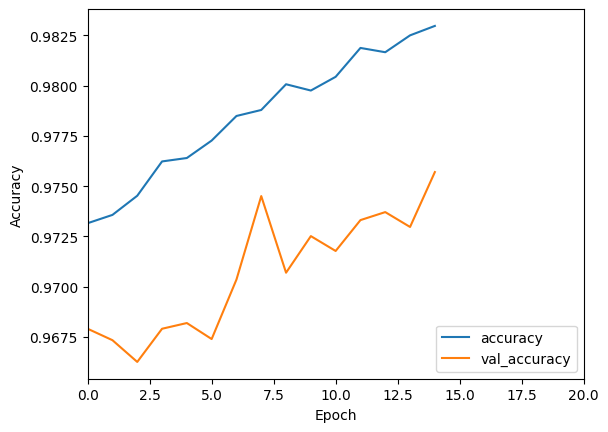

In [12]:
plt.plot(fine_tuning_history.history['accuracy'], label='accuracy')
plt.plot(fine_tuning_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0,20])
plt.legend(loc='lower right')
plt.show()



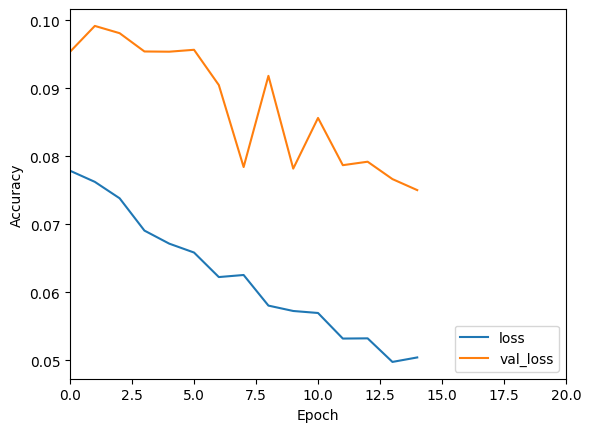

In [13]:
plt.plot(fine_tuning_history.history['loss'], label='loss')
plt.plot(fine_tuning_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0,20])
plt.legend(loc='lower right')
plt.show()